# SQL Queries & Data Visualization in Bike Store DB

# About dataset

* Bike Store Relational Database is the sample database from sqlservertutorial.net.
* This is a great dataset for learning SQL and practicing querying relational databases.

# Library

In [2]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from datetime import datetime

# Read in CSV files

In [4]:
brands = pd.read_csv('brands.csv')
categories = pd.read_csv('categories.csv')
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
staffs = pd.read_csv('staffs.csv')
stocks = pd.read_csv('stocks.csv')
stores = pd.read_csv('stores.csv')

# Create database connection

In [6]:
db = sql.connect('bike_store.db')

# Insert data into database

In [8]:
print("number of rows in brands: " + str(brands.to_sql('brands', db, if_exists='replace', index=False)))
print("number of rows in categories: " + str(categories.to_sql('categories', db, if_exists='replace', index=False)))
print("number of rows in customers: " + str(customers.to_sql('customers', db, if_exists='replace', index=False)))
print("number of rows in order_items: " + str(order_items.to_sql('order_items', db, if_exists='replace', index=False)))
print("number of rows in orders: " + str(orders.to_sql('orders', db, if_exists='replace', index=False)))
print("number of rows in products: " + str(products.to_sql('products', db, if_exists='replace', index=False)))
print("number of rows in staffs: " + str(staffs.to_sql('staffs', db, if_exists='replace', index=False)))
print("number of rows in stocks: " + str(stocks.to_sql('stocks', db, if_exists='replace', index=False)))
print("number of rows in stores: " + str(stores.to_sql('stores', db, if_exists='replace', index=False)))

number of rows in brands: 9
number of rows in categories: 7
number of rows in customers: 1445
number of rows in order_items: 4722
number of rows in orders: 1615
number of rows in products: 321
number of rows in staffs: 10
number of rows in stocks: 939
number of rows in stores: 3


# Show tables

In [10]:
q1 = '''
SELECT * FROM brands;
'''

df1 = pd.read_sql_query(q1, db)
df1

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [12]:
q2 = '''
SELECT * FROM categories;
'''

df2 = pd.read_sql_query(q2, db)
df2

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [14]:
q3 = '''
SELECT * FROM customers;
'''

df3 = pd.read_sql_query(q3, db)
df3

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [16]:
q4 = '''
SELECT * FROM order_items;
'''

df4 = pd.read_sql_query(q4, db)
df4

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [18]:
q5 = '''
SELECT * FROM orders;
'''

df5 = pd.read_sql_query(q5, db)
df5

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


In [20]:
q6 = '''
SELECT * FROM products;
'''

df6 = pd.read_sql_query(q6, db)
df6

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [22]:
q7 = '''
SELECT * FROM staffs;
'''

df7 = pd.read_sql_query(q7, db)
df7

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [24]:
q8 = '''
SELECT * FROM stocks;
'''

df8 = pd.read_sql_query(q8, db)
df8

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


In [26]:
q9 = '''
SELECT * FROM stores;
'''

df9 = pd.read_sql_query(q9, db)
df9

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


# ERD

![image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4146319%2Fc5838eb006bab3938ad94de02f58c6c1%2FSQL-Server-Sample-Database.png?generation=1692609884383007&alt=media)

# Analysis

## Number of stocks based on category name and store name

In [32]:
query1 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN stocks ON products.product_id = stocks.product_id
JOIN stores ON stocks.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result1 = pd.read_sql_query(query1, db)
result1

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


In [34]:
result1.dtypes

store_name       object
category_name    object
sum_qty           int64
dtype: object

In [36]:
store = result1['store_name'].unique()
result1['store_name'] = pd.Categorical(result1['store_name'], categories = store, ordered = True)

category = result1['category_name'].unique()
result1['category_name'] = pd.Categorical(result1['category_name'], categories = category, ordered = True)

In [38]:
result1.dtypes

store_name       category
category_name    category
sum_qty             int64
dtype: object

C:\Users\sachi\AppData\Local\Temp\ipykernel_10908\2580447575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result1 = result1.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)


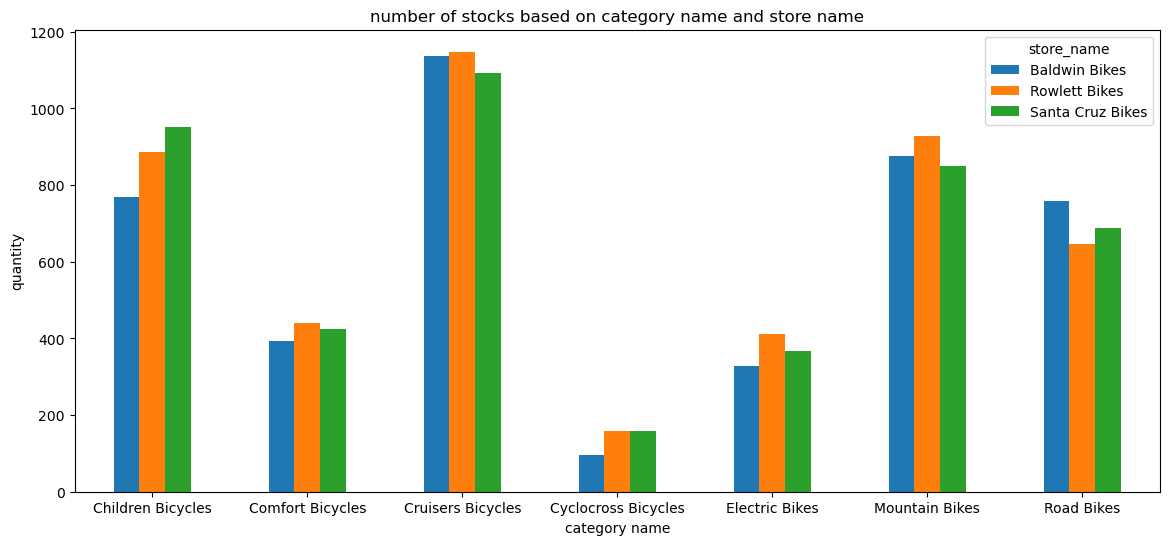

In [40]:
result1 = result1.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)

ax = result1.plot(kind = 'bar', figsize = (14, 6))
plt.title('number of stocks based on category name and store name')
plt.xlabel('category name')
plt.ylabel('quantity')
plt.xticks(rotation = 0)

plt.show()

## Number of order items based on category name and store name

In [43]:
query2 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN order_items ON products.product_id = order_items.product_id
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result2 = pd.read_sql_query(query2, db)
result2

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
2,Baldwin Bikes,Cruisers Bicycles,1396
3,Baldwin Bikes,Cyclocross Bicycles,271
4,Baldwin Bikes,Electric Bikes,202
5,Baldwin Bikes,Mountain Bikes,1170
6,Baldwin Bikes,Road Bikes,374
7,Rowlett Bikes,Children Bicycles,117
8,Rowlett Bikes,Comfort Bicycles,87
9,Rowlett Bikes,Cruisers Bicycles,245


In [45]:
result2.dtypes

store_name       object
category_name    object
sum_qty           int64
dtype: object

In [47]:
store = result2['store_name'].unique()
result2['store_name'] = pd.Categorical(result2['store_name'], categories = store, ordered = True)

category = result2['category_name'].unique()
result2['category_name'] = pd.Categorical(result2['category_name'], categories = category, ordered = True)

In [49]:
result2.dtypes

store_name       category
category_name    category
sum_qty             int64
dtype: object

C:\Users\sachi\AppData\Local\Temp\ipykernel_10908\2941144186.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result2 = result2.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)


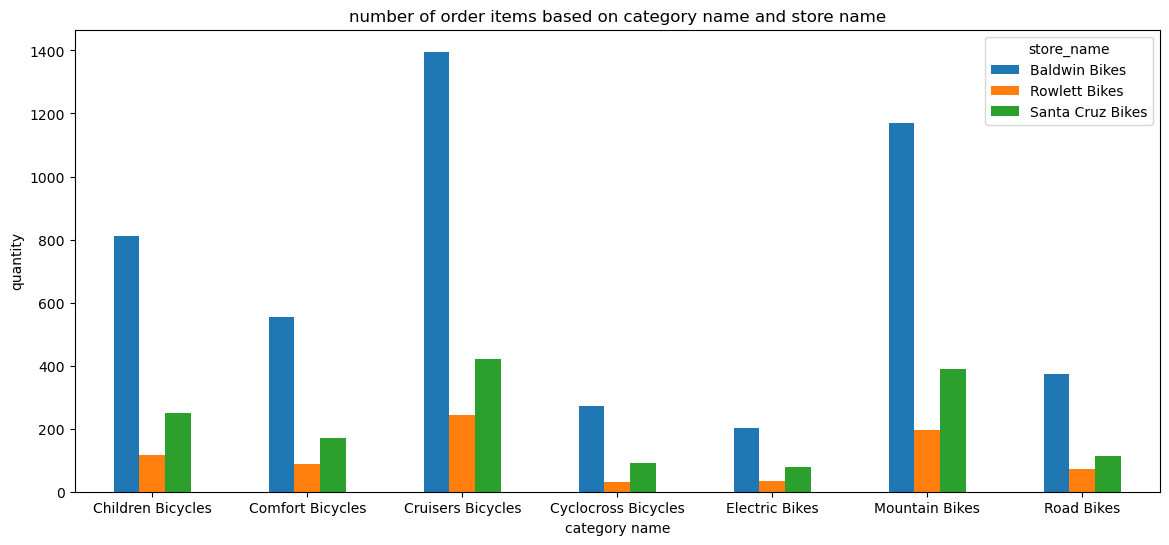

In [51]:
result2 = result2.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)
# try ploting in different cell because if you want to reassign new size of figure then there will be error because result2 is changed 
ax = result2.plot(kind = 'bar', figsize = (14, 6))
plt.title('number of order items based on category name and store name')
plt.xlabel('category name')
plt.ylabel('quantity')
plt.xticks(rotation = 0)

plt.show()

## Total sales in Santa Cruz Bikes based on year month

In [53]:
query3 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Santa Cruz Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result3 = pd.read_sql_query(query3, db)
result3

,year_month,total_price
0,2016 01,71760.3064
1,2016 02,35255.4513
2,2016 03,46817.6251
3,2016 04,34230.6401
4,2016 05,28095.2399
5,2016 06,41554.1683
6,2016 07,21258.8857
7,2016 08,44803.6003
8,2016 09,65159.6319
9,2016 10,69175.4980


In [55]:
result3.dtypes

year_month      object
total_price    float64
dtype: object

In [57]:
result3['year_month'] = pd.to_datetime(result3['year_month'], format = '%Y %m')

In [59]:
result3.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

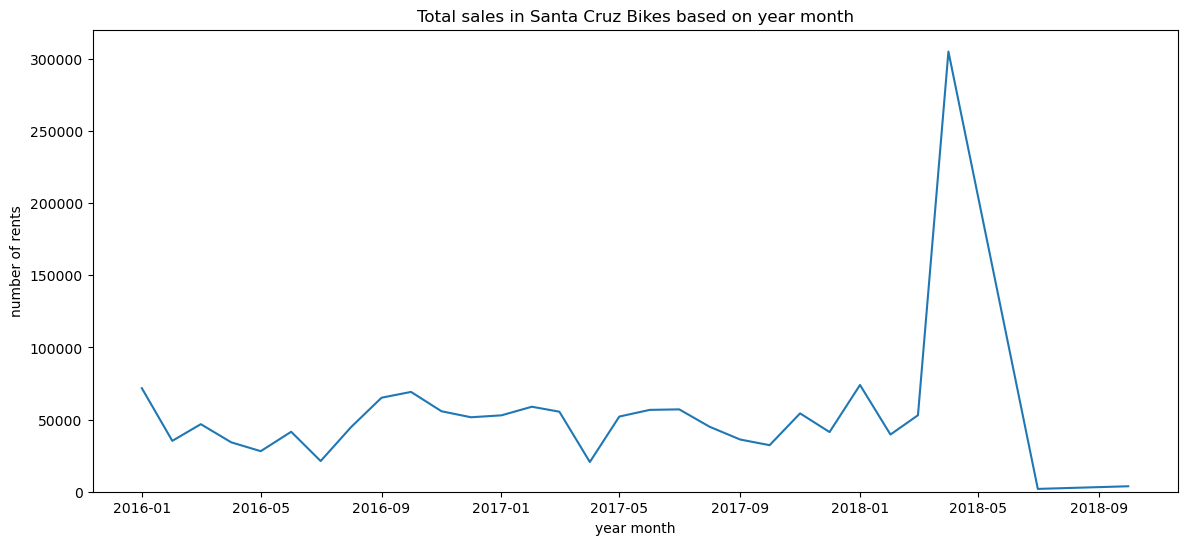

In [61]:
plt.subplots(figsize=(14, 6))

plt.plot(result3['year_month'], result3['total_price'])
plt.title('Total sales in Santa Cruz Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('number of rents')
plt.ylim(bottom = 0)

plt.show()

## Total sales in Baldwin Bikes based on year month

In [63]:
query4 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Baldwin Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result4 = pd.read_sql_query(query4, db)
result4

,year_month,total_price
0,2016 01,132894.2968
1,2016 02,102201.9071
2,2016 03,110338.7916
3,2016 04,120491.9842
4,2016 05,150679.6523
5,2016 06,139021.3866
6,2016 07,167320.8731
7,2016 08,142994.2888
8,2016 09,164368.6516
9,2016 10,129251.7324


In [65]:
result4.dtypes

year_month      object
total_price    float64
dtype: object

In [67]:
result4['year_month'] = pd.to_datetime(result4['year_month'], format = '%Y %m')

In [69]:
result4.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

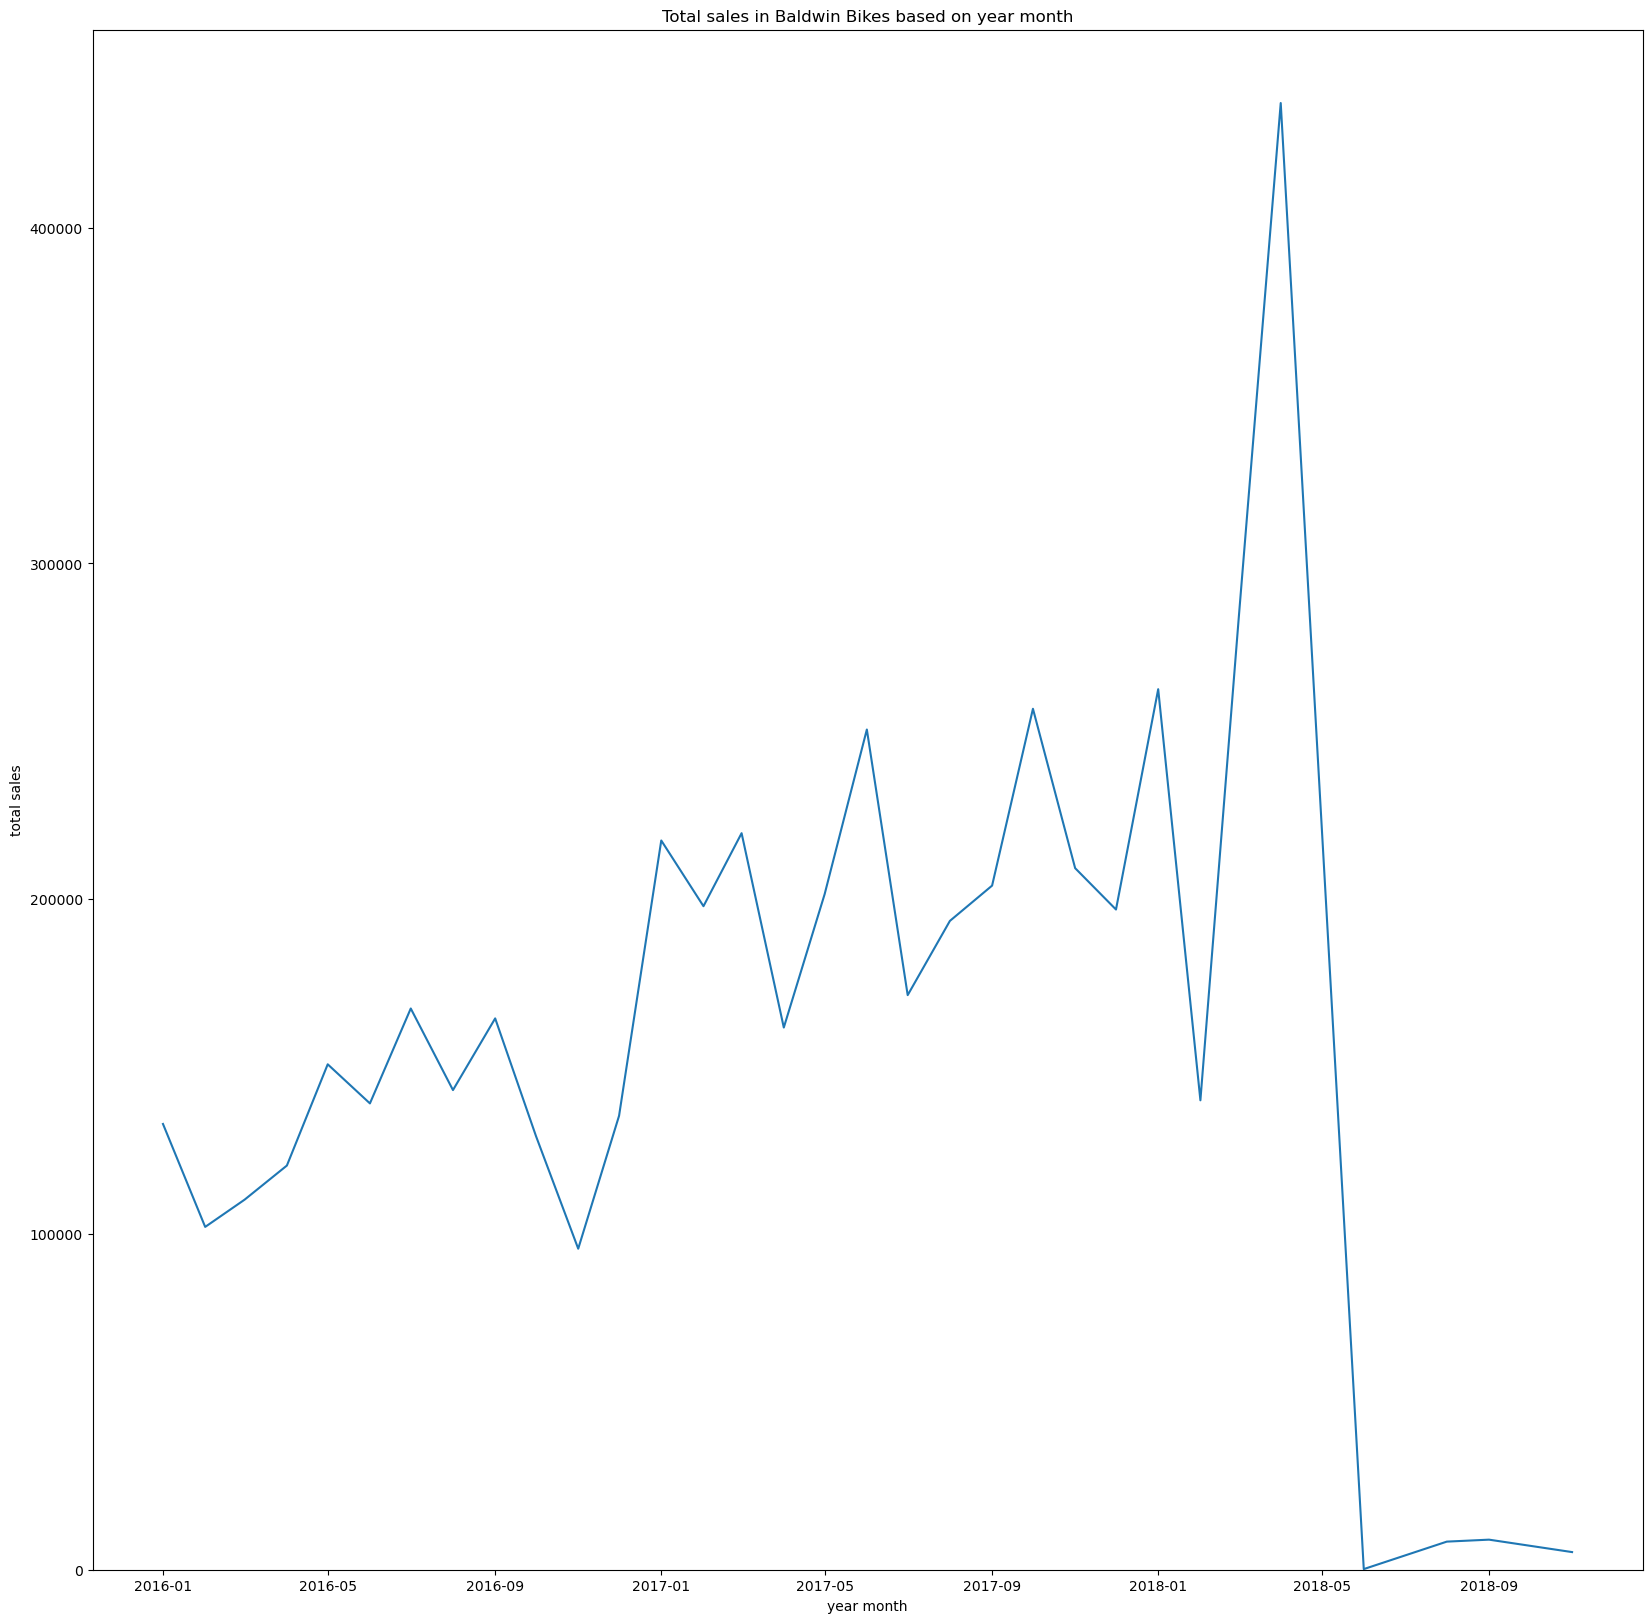

In [71]:
plt.subplots(figsize=(20, 20))

plt.plot(result4['year_month'], result4['total_price'])
plt.title('Total sales in Baldwin Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('total sales')
plt.ylim(bottom = 0)

plt.show()

## Total sales in Rowlett Bikes based on year month

In [74]:
query5 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Rowlett Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result5 = pd.read_sql_query(query5, db)
result5

,year_month,total_price
0,2016 01,10491.8209
1,2016 02,18654.9644
2,2016 03,23443.9118
3,2016 04,12421.4269
4,2016 05,26495.1169
5,2016 06,29986.5696
6,2016 07,10977.0501
7,2016 08,37859.4876
8,2016 09,43563.3262
9,2016 10,13650.8501


In [76]:
result5.dtypes

year_month      object
total_price    float64
dtype: object

In [78]:
result5['year_month'] = pd.to_datetime(result5['year_month'], format = '%Y %m')

In [80]:
result5.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

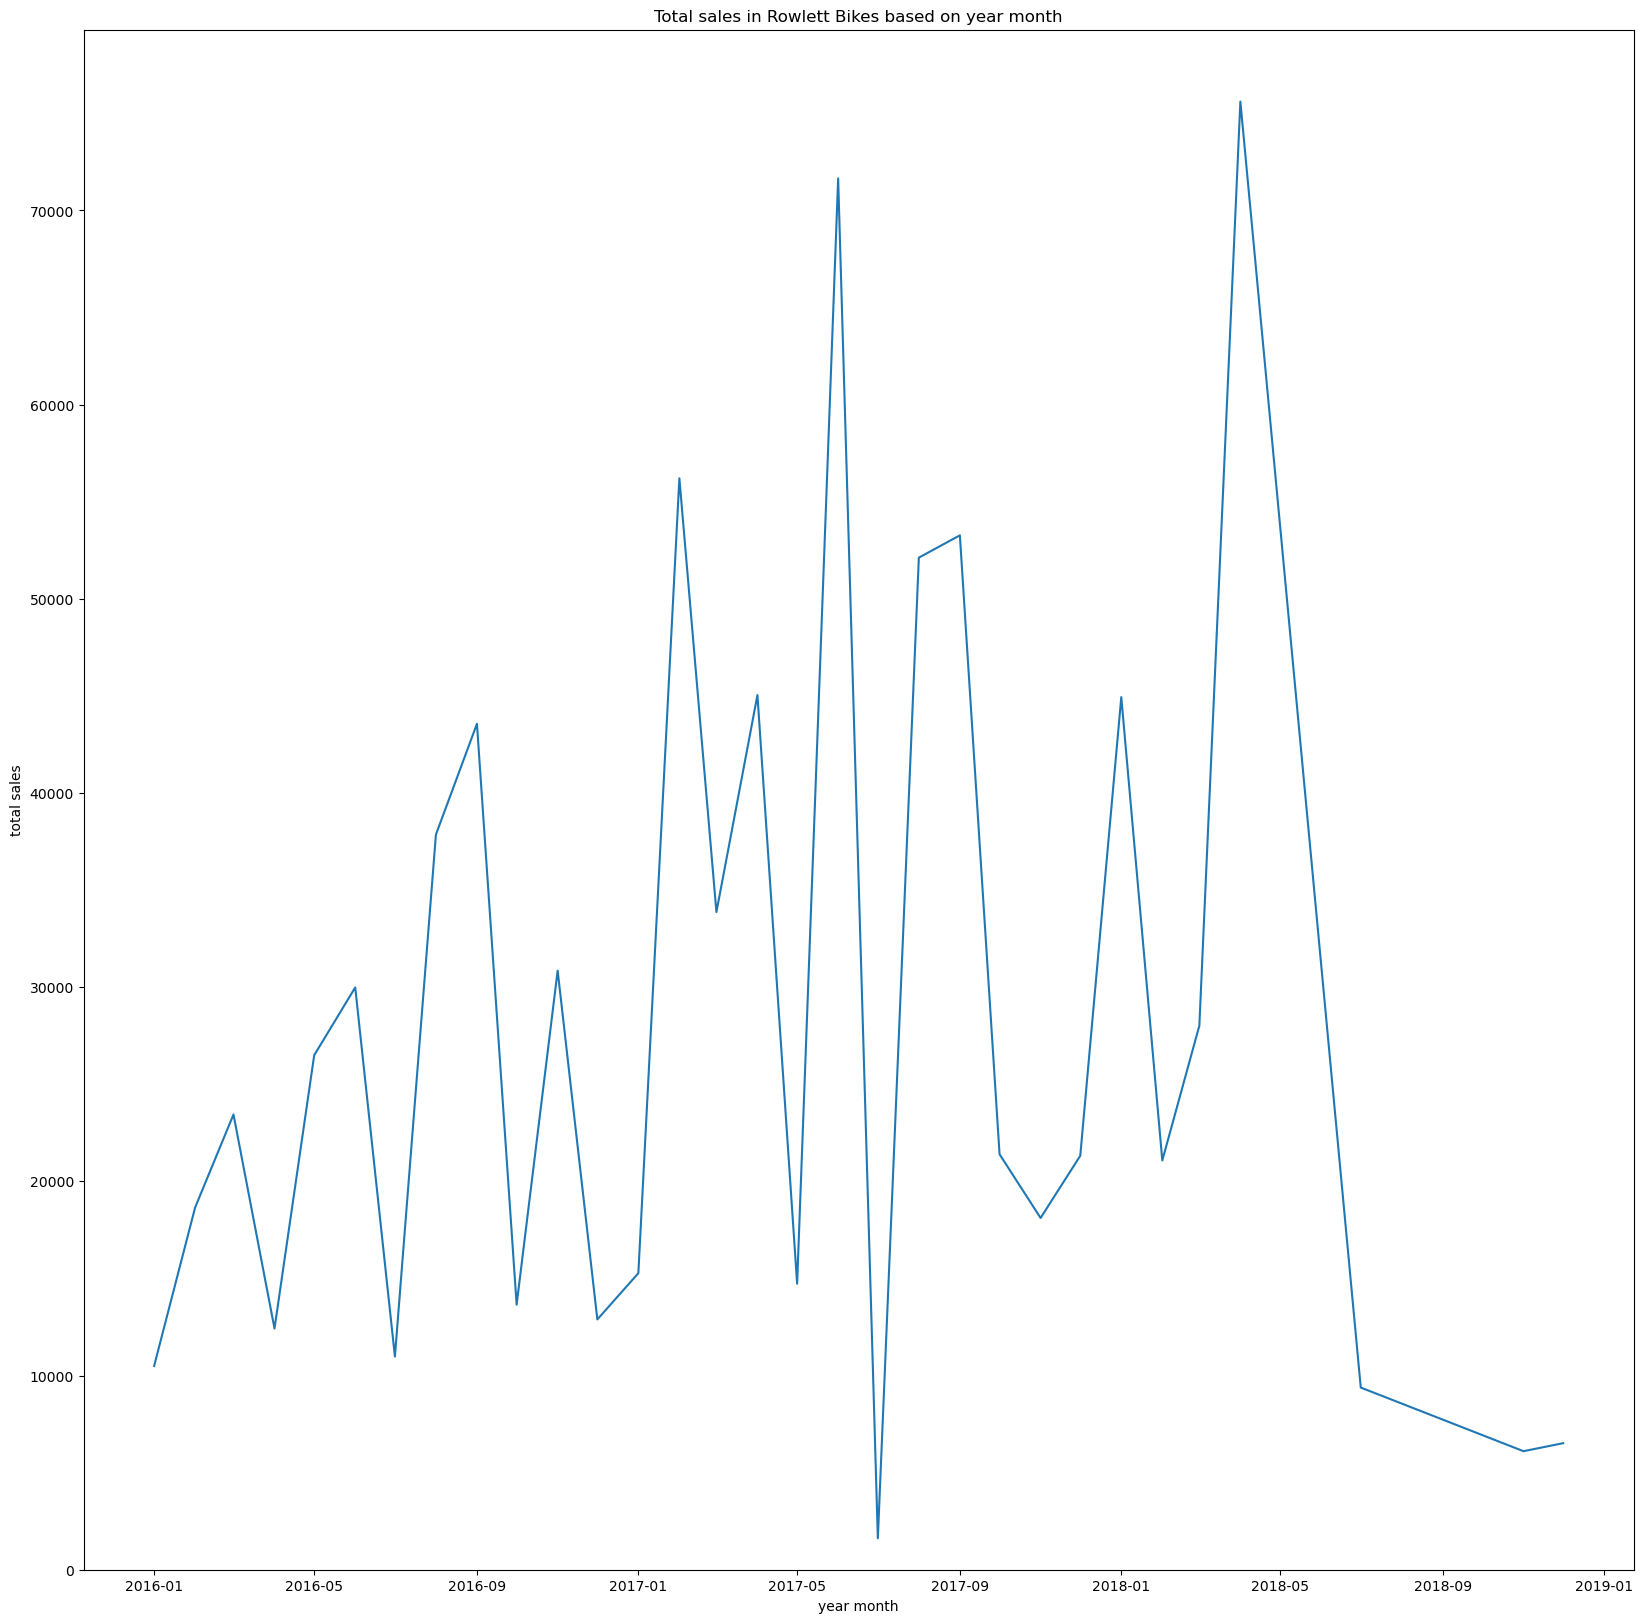

In [82]:
plt.subplots(figsize=(20, 20))

plt.plot(result5['year_month'], result5['total_price'])
plt.title('Total sales in Rowlett Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('total sales')
plt.ylim(bottom = 0)

plt.show()

## Staff with the highest number of orders

In [85]:
query6 = '''
SELECT staffs.staff_id, staffs.first_name, staffs.last_name, COUNT(orders.order_id) AS numberof_orders
FROM orders
JOIN staffs ON orders.staff_id = staffs.staff_id
GROUP BY staffs.staff_id
HAVING numberof_orders = (SELECT MAX(x)
                          FROM (SELECT s.staff_id, s.first_name, s.last_name, COUNT(o.order_id) AS x
                                FROM orders AS o
                                JOIN staffs AS s ON o.staff_id = s.staff_id
                                GROUP BY s.staff_id) AS y)
'''

result6 = pd.read_sql_query(query6, db)
result6

,staff_id,first_name,last_name,numberof_orders
0,6,Marcelene,Boyer,553


## Staff with the lowest number of orders

In [87]:
query7 = '''
SELECT staffs.staff_id, staffs.first_name, staffs.last_name, COUNT(orders.order_id) AS numberof_orders
FROM orders
JOIN staffs ON orders.staff_id = staffs.staff_id
GROUP BY staffs.staff_id
HAVING numberof_orders = (SELECT MIN(x)
                          FROM (SELECT s.staff_id, s.first_name, s.last_name, COUNT(o.order_id) AS x
                                FROM orders AS o
                                JOIN staffs AS s ON o.staff_id = s.staff_id
                                GROUP BY s.staff_id) AS y)
'''

result7 = pd.read_sql_query(query7, db)
result7

,staff_id,first_name,last_name,numberof_orders
0,9,Layla,Terrell,86
